## Tweets Descriptive Analysis

Here we will describe the content in the Trump Tweets by:
1. count of words, url and tags mention
2. word cloud for positive and negative sentiment
3. frequency calculation

### Count of words, url and tag mentions in Tweets unprocessed

In [3]:
import nltk
from nltk.corpus import stopwords
import pandas as pd

stop_words=set(nltk.corpus.stopwords.words('english'))


sentiment_50k=pd.read_csv("Tweets_50k.csv")
sentiment_50k.head()

all_words=[word for nt in sentiment_50k.Tweet for word in nltk.word_tokenize(nt) if word not in stop_words]

In [4]:
mentions=[w for w in all_words if w.startswith("@")]
url=[h for h in all_words if h.startswith("http")]
words=set(all_words)
n=len(words)

print("number of mentions=",len(mentions))
print("number of urls=",len(url))
print(n)

number of mentions= 23916
number of urls= 2192
72483


In [5]:


Trump=pd.read_excel("2017_01_28TrumpTweets.xlsx")
all_words=[word for nt in Trump.Tweet for word in nltk.word_tokenize(nt) if word not in stop_words]
mentions=[w for w in all_words if w.startswith("@")]
url=[h for h in all_words if h.startswith("http")]
words=set(all_words)
n=len(words)

print("number of mentions=",len(mentions))
print("number of urls=",len(url))
print(n)

number of mentions= 37433
number of urls= 7571
48801


### Word Cloud for Positive and Negative Sentiment Tweet Words in the Sentiment 140 Dataset  *Processed

Cloud of All Words


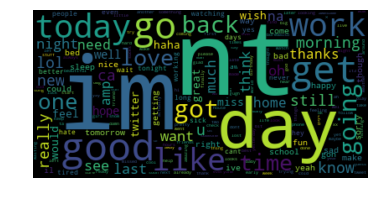

Cloud of Negative Words


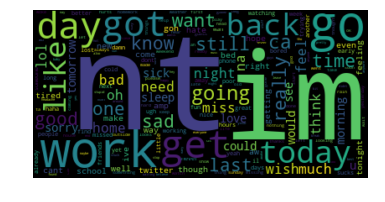

Cloud of Positive Words


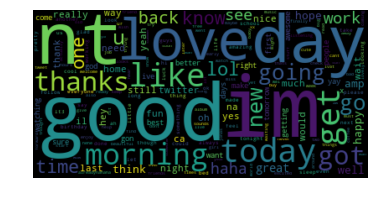

In [7]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

sentiment=pd.read_csv("Tweets_50kProc.csv")

def list_of_words(tweets):
    ls=[word for nt in tweets for word in nltk.word_tokenize(str(nt)) if word not in stop_words]
    p=[word for word in ls if not word.isnumeric()]
    return p

def plot_cloud(words):
    BadDist=nltk.FreqDist(words)
    words_f=BadDist.most_common(50)
    wordcloud=WordCloud()
    wordcloud.generate_from_frequencies(frequencies=BadDist)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()



tweets=sentiment.tweets
good_tweets=sentiment.tweets[sentiment.label != 0]
bad_tweets=sentiment.tweets[sentiment.label !=4]

all_words=list_of_words(np.array(tweets))
positive_words=list_of_words(good_tweets)
negative_words=list_of_words(bad_tweets)
print("Cloud of All Words")
plot_cloud(all_words)

print("Cloud of Negative Words")
plot_cloud(negative_words)
print("Cloud of Positive Words")
plot_cloud(positive_words)


